In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from sklearn import metrics
from sklearn.calibration import calibration_curve
from tkinter import filedialog as fd

## Upload csv files with predictions
csv file must contain one column with filename and a second column with predictions!

In [6]:
list_predictions = []
continues = True
root = tk.Tk()

while continues:
    path_predictions = fd.askopenfilename()
    root.mainloop()
    predictions = pd.read_csv(path_predictions)
    list_predictions.append(predictions.iloc[:, 1])
    
    answer = input("Do you whish to upload another file with predictions? \nIf yes, type 'y'. If no, type 'n'.\n")
    if answer == "n":
        continues = False

Do you whish to upload another file with predictions? 
If yes, type 'y'. If no, type 'n'.
y
Do you whish to upload another file with predictions? 
If yes, type 'y'. If no, type 'n'.
n


In [10]:
list_predictions

[0     0
 1     1
 2     0
 3     0
 4     0
 5     1
 6     1
 7     0
 8     0
 9     0
 10    1
 11    1
 Name: prediction, dtype: int64,
 0     0
 1     0
 2     0
 3     1
 4     1
 5     0
 6     1
 7     0
 8     0
 9     0
 10    0
 11    0
 Name: prediction, dtype: int64]

## Upload the ground truth labels
Must be in the same format as the prediction files

In [29]:
# Upload the ground truth labels
path_labels = fd.askopenfilename()
root.mainloop()
file = pd.read_csv(path_labels) 
labels = file.iloc[:,1]

# If want to plot more than 10 curves, add more colors
list_colors = ["darkorange", "red", "blue", "purple", "yellow", "green", "black", "brown", "lightgreen", "lightblue"]

In [35]:
def get_multiple_auc_roc_curves(list_predictions, labels):
    """
    Generate multiple the AUC-ROC curves in one plot
    """
    plt.figure()
    for i, predictions in enumerate(list_predictions):
        # Plot roc curve
        auc_fpr, auc_tpr, auc_thresholds = metrics.roc_curve(labels, predictions)
        
        # plot the roc curve for the model
        plt.ylim(0., 1.0)
        plt.xlim(0., 1.0)
        plt.plot(auc_fpr, auc_tpr, marker='.', color=list_colors[i], label=f"AUC-ROC curve {i}")
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()

    plt.show()

In [36]:
def get_multiple_calibration_curves(list_predictions, labels):
    """
    Generate multiple calibration curves in one plot
    """
    plt.figure()
    for i, predictions in enumerate(list_predictions):
        # Plot roc curve
        y, x = calibration_curve(labels, predictions, n_bins=10)

        # plot the roc curve for the model
        plt.ylim(0., 1.0)
        plt.xlim(0., 1.0)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.plot(y, x, marker='^', linestyle="", markersize=7, color=list_colors[i], label=f"calibration curve {i}")

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()

    plt.show()

In [39]:
def get_multiple_auc_roc_and_calibration_curves(list_predictions, labels):
    """
    Generate multiple AUC-ROC and calibration curves in one plot
    """
    plt.figure()
    for i, predictions in enumerate(list_predictions):
        # Plot roc curve and calibration curve
        auc_fpr, auc_tpr, auc_thresholds = metrics.roc_curve(labels, predictions)
        y, x = calibration_curve(labels, predictions, n_bins=10)

        # plot the roc and calibration curve for the model
        plt.ylim(0., 1.0)
        plt.xlim(0., 1.0)
        plt.plot(auc_fpr, auc_tpr, marker='.', color=list_colors[i], label=f"AUC-ROC curve {i}")
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.plot(y, x, marker='^', linestyle="", markersize=7, color=list_colors[i], label=f"calibration curve {i}")

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()

    plt.show()

## Plot only the AUC-ROC curves of the experiments

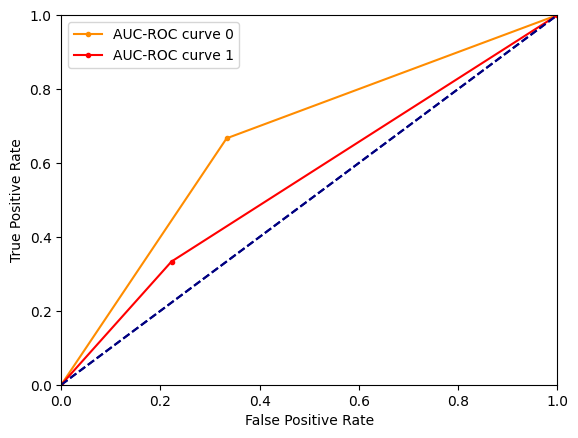

In [38]:
multiple_auc_roc = get_multiple_auc_roc_curves(list_predictions, labels)

## Plot only the calibration curves of the experiments

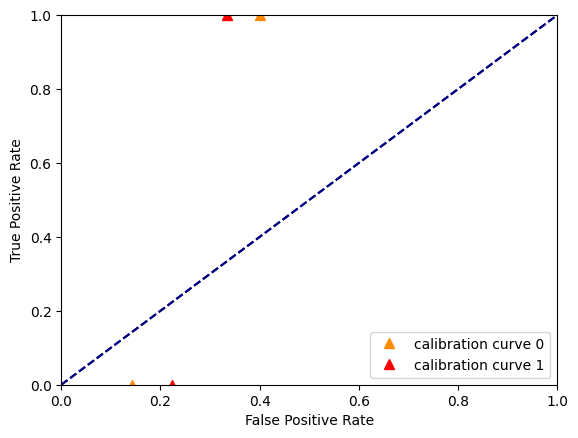

In [40]:
multiple_calibration = get_multiple_calibration_curves(list_predictions, labels)

## Plot both the AUC-ROC and calibration curves of the experiments

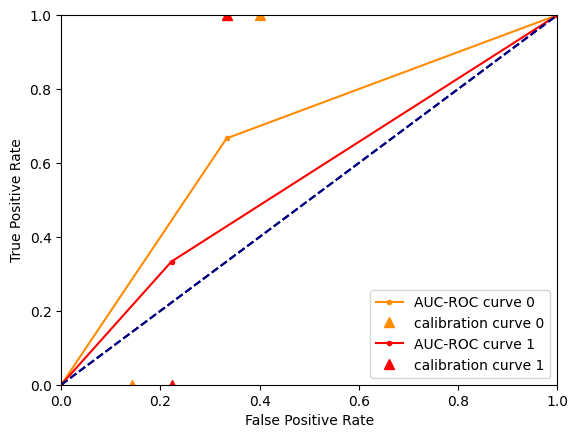

In [41]:
multiple_auc_roc_and_calibration = get_multiple_auc_roc_and_calibration_curves(list_predictions, labels)